In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
import MultiLayerNet as MLN 
from mpl_toolkits.mplot3d import Axes3D
from common.functions import softmax, cross_entropy_error

In [2]:
# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape,t_train.shape)


(60000, 784) (60000, 10)


In [3]:
batch_size = 100 
train_size = x_train.shape[0]
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [4]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [5]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x 

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

0.1999999999990898
0.6999999999912632


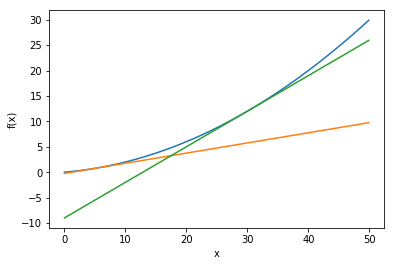

In [6]:
x = np.arange(0.0, 50.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)
tf = tangent_line(function_1, 30)
y3 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

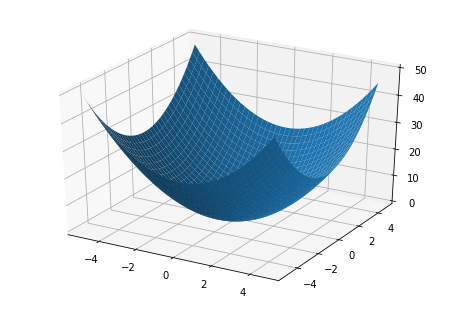

In [7]:
fig=plt.figure()
ax=Axes3D(fig)
x0=np.arange(-5,5,0.25)
x1=np.arange(-5,5,0.25)
x,y=np.meshgrid(x0,x1)
#高度
z= x**2+y**2
#填充rainbow颜色
ax.plot_surface(x,y,z,rstride=1,cstride=1) #,cmap=plt.get_cmap('rainbow'))
#ax.contourf(x,y,z,zdir='z',offset=-2,cmap='rainbow')
#绘制3D图形,zdir表示从哪个坐标轴上压下去
plt.show()


In [8]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        #print(x, fxh1, fxh2)
        grad[idx] = (fxh1 - fxh2) / (2*h)        
        x[idx] = tmp_val # 还原值        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

(2, 324) 2


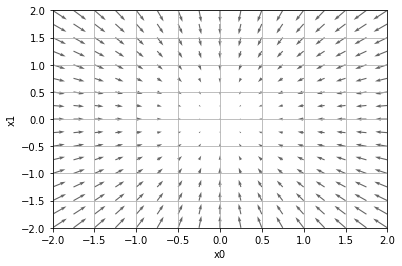

In [9]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()
XY = np.array([X, Y])
print(XY.shape, XY.ndim)
grad = numerical_gradient(function_2, XY )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
#plt.legend()
plt.draw()
plt.show()

In [10]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

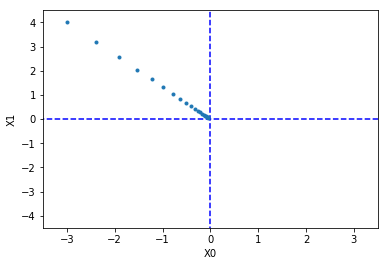

In [11]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], '.')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [12]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        #print(x ,t)
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [13]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W) # np.random.randn(2,3) ) #  

print(dW)
#print(net.W)


[[ 0.35827639  0.08547102 -0.44374742]
 [ 0.53741459  0.12820654 -0.66562113]]


In [14]:
def twoLayerNet(input_size, hidden_size, output_size):
    return MLN.MultiLayerNet([input_size, hidden_size, output_size]);

In [15]:
# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network = twoLayerNet(input_size=784, hidden_size=50, output_size=10)
# 三层网络 感觉还没有上面的两层网络收敛速度快，但是增加训练时间最终可以得到96%的成绩，应该也算不错了
# 通过逐步减少学习率 可以将精度提高到97%以上（97.81%）
network = MLN.MultiLayerNet([784, 200, 50, 10]);

In [16]:
iters_num = 30000  # 适当设定循环的次数
train_size = x_train.shape[0]
batch_size = 200
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    if i > iters_num / 3 :
        learning_rate = 0.6
    elif  i > iters_num / 3 * 2 :
        earning_rate = 0.3
    # 计算梯度 numerical_gradient 效率太低, iters_num = 100 都需要运行很长时间，
    #grad = network.numerical_gradient(x_batch, t_batch)
    gW, gB = network.gradient(x_batch, t_batch)
    
    # 更新参数
    for j in range(network.l):
        network.W[j] -= learning_rate * gW[j]
        network.B[j] -= learning_rate * gB[j]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09873333333333334, 0.1006
train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.21385, 0.215
train acc, test acc | 0.3606333333333333, 0.3587
train acc, test acc | 0.48113333333333336, 0.4835
train acc, test acc | 0.5734833333333333, 0.5701
train acc, test acc | 0.6848333333333333, 0.6885
train acc, test acc | 0.7631333333333333, 0.7704
train acc, test acc | 0.8097333333333333, 0.8128
train acc, test acc | 0.8335166666666667, 0.837
train acc, test acc | 0.8500666666666666, 0.8518
train acc, test acc | 0.8631166666666666, 0.8629
train acc, test acc | 0.8750333333333333, 0.8762
train acc, test acc | 0.8841833333333333, 0.8846
train acc, test acc | 0.89145, 0.8924
train acc, test acc | 0.8974666666666666, 0.8993
train acc, test acc | 0.9004, 0.9027
tr

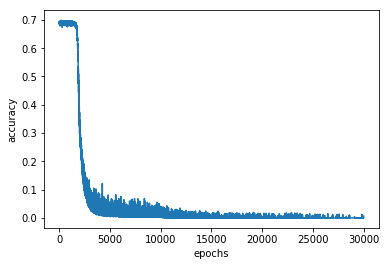

In [17]:
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list)
plt.xlabel("epochs")
plt.ylabel("accuracy")
#plt.ylim(0, 1.0)
#plt.legend(loc='lower right')
plt.show()

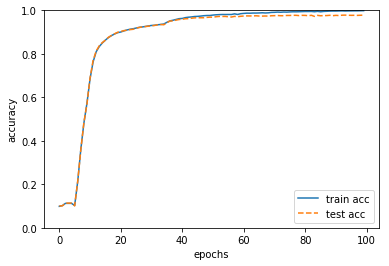

In [18]:
# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [19]:
# 用前面一章的测试算法 检测一下这个训练的网络的效果
batch_size = 100 # 批数量
accuracy_cnt = 0

for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    y_batch = network.predict(x_batch)
    p = np.argmax(y_batch, axis=1)
    t = t_test[i:i+batch_size]
    t = t.argmax(axis=1)
    accuracy_cnt += np.sum(p == t)

print("Accuracy: %.2f%%" %(float(accuracy_cnt) / len(x_test) * 100))

Accuracy: 97.81%
